# Proyecto Salud Mental y Tasas de Suicidios 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Modelo

In [2]:
df_suicide = pd.read_csv("./world-suicide/master.csv")
df_suicide = df_suicide.drop(['country-year', 'HDI for year'], axis=1)
df_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [3]:
df_suicide.rename(columns={
    'suicides/100k pop': 'Suicides',
    'country': 'Country',
    'year': 'Year',
    'population': 'Population',
    'age': 'Age',
    'sex': 'Sex',
    'generation': 'Generation',
    ' gdp_for_year ($) ': 'GDP_Year',
    'gdp_per_capita ($)': 'GDP_Capita'}, 
    inplace=True)
df_suicide["Suicides"] = df_suicide['suicides_no']*100 / df_suicide['Population']
del df_suicide["suicides_no"]
del df_suicide["GDP_Year"]
del df_suicide["Generation"]
del df_suicide["Population"]
del df_suicide["Sex"]
del df_suicide["Age"]
df_suicide

,Country,Year,Suicides,GDP_Capita
0,Albania,1987,0.006711,796
1,Albania,1987,0.005195,796
2,Albania,1987,0.004833,796
3,Albania,1987,0.004587,796
4,Albania,1987,0.003281,796
...,...,...,...,...
27815,Uzbekistan,2014,0.002955,2309
27816,Uzbekistan,2014,0.002583,2309
27817,Uzbekistan,2014,0.002172,2309
27818,Uzbekistan,2014,0.001672,2309


In [4]:
is_2015 =  df_suicide['Year']==2015
df_2015 = df_suicide[is_2015]
df_2015

,Country,Year,Suicides,GDP_Capita
576,Antigua and Barbuda,2015,0.015618,14853
577,Antigua and Barbuda,2015,0.000000,14853
578,Antigua and Barbuda,2015,0.000000,14853
579,Antigua and Barbuda,2015,0.000000,14853
580,Antigua and Barbuda,2015,0.000000,14853
...,...,...,...,...
27551,Uruguay,2015,0.009908,16696
27552,Uruguay,2015,0.008627,16696
27553,Uruguay,2015,0.006665,16696
27554,Uruguay,2015,0.001188,16696


In [5]:
country_rate = df_2015.groupby('Country').Suicides.mean().reset_index()

In [6]:
country_gdp_cap = df_2015.groupby('Country').GDP_Capita.mean().reset_index()

In [7]:
new_2015 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2015["GDP_Capita"] = new_2015["GDP_Capita"]
new_2015["Year"] = 2015
new_2015

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,0.001301,14853,2015
1,Argentina,0.009344,14981,2015
2,Armenia,0.003773,3775,2015
3,Australia,0.012849,60656,2015
4,Austria,0.016217,46484,2015
...,...,...,...,...
57,Turkmenistan,0.002373,7326,2015
58,Ukraine,0.020394,2256,2015
59,United Kingdom,0.007229,47240,2015
60,United States,0.014617,60387,2015


In [8]:
is_2015 =  df_suicide['Year']==2015
df_2015 = df_suicide[is_2015]
df_2015

,Country,Year,Suicides,GDP_Capita
576,Antigua and Barbuda,2015,0.015618,14853
577,Antigua and Barbuda,2015,0.000000,14853
578,Antigua and Barbuda,2015,0.000000,14853
579,Antigua and Barbuda,2015,0.000000,14853
580,Antigua and Barbuda,2015,0.000000,14853
...,...,...,...,...
27551,Uruguay,2015,0.009908,16696
27552,Uruguay,2015,0.008627,16696
27553,Uruguay,2015,0.006665,16696
27554,Uruguay,2015,0.001188,16696


In [9]:
country_rate = df_2015.groupby('Country').Suicides.mean().reset_index()

In [10]:
country_gdp_cap = df_2015.groupby('Country').GDP_Capita.mean().reset_index()

In [11]:
new_2015 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2015["GDP_Capita"] = new_2015["GDP_Capita"]
new_2015["Year"] = 2015
new_2015

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,0.001301,14853,2015
1,Argentina,0.009344,14981,2015
2,Armenia,0.003773,3775,2015
3,Australia,0.012849,60656,2015
4,Austria,0.016217,46484,2015
...,...,...,...,...
57,Turkmenistan,0.002373,7326,2015
58,Ukraine,0.020394,2256,2015
59,United Kingdom,0.007229,47240,2015
60,United States,0.014617,60387,2015


In [12]:
is_2016 =  df_suicide['Year']==2016
df_2016 = df_suicide[is_2016]
df_2016

,Country,Year,Suicides,GDP_Capita
1248,Armenia,2016,0.019369,3788
1249,Armenia,2016,0.006728,3788
1250,Armenia,2016,0.004563,3788
1251,Armenia,2016,0.002473,3788
1252,Armenia,2016,0.001953,3788
...,...,...,...,...
25307,Thailand,2016,0.004342,6713
25308,Thailand,2016,0.003670,6713
25309,Thailand,2016,0.003528,6713
25310,Thailand,2016,0.002467,6713


In [13]:
country_rate = df_2016.groupby('Country').Suicides.mean().reset_index()

In [14]:
country_gdp_cap = df_2016.groupby('Country').GDP_Capita.mean().reset_index()

In [15]:
new_2016 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2016["GDP_Capita"] = new_2016["GDP_Capita"]
new_2016["Year"] = 2016
new_2016

,Country,Suicides,GDP_Capita,Year
0,Armenia,0.004056,3788,2016
1,Austria,0.018323,46976,2016
2,Croatia,0.021355,12905,2016
3,Cyprus,0.004715,25098,2016
4,Czech Republic,0.016176,19505,2016
5,Grenada,0.000000,10838,2016
6,Hungary,0.024133,13448,2016
7,Iceland,0.013806,64708,2016
8,Lithuania,0.036172,15742,2016
9,Mauritius,0.009930,10570,2016


In [16]:
is_2017 =  df_suicide['Year']==2014
df_2017 = df_suicide[is_2017]
df_2017

country_rate = df_2017.groupby('Country').Suicides.mean().reset_index()

country_gdp_cap = df_2017.groupby('Country').GDP_Capita.mean().reset_index()

new_2017 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2017["GDP_Capita"] = new_2017["GDP_Capita"]
new_2017["Year"] = 2017
new_2017

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,0.000000,14093,2017
1,Argentina,0.009279,13400,2017
2,Armenia,0.003084,4142,2017
3,Australia,0.012423,66809,2017
4,Austria,0.017485,54278,2017
...,...,...,...,...
73,Ukraine,0.020875,3299,2017
74,United Kingdom,0.006992,49906,2017
75,United States,0.014277,58531,2017
76,Uruguay,0.020720,18012,2017


In [17]:
is_2018 =  df_suicide['Year']==2013
df_2018 = df_suicide[is_2018]
df_2018

country_rate = df_2018.groupby('Country').Suicides.mean().reset_index()

country_gdp_cap = df_2018.groupby('Country').GDP_Capita.mean().reset_index()

new_2018 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2018["GDP_Capita"] = new_2018["GDP_Capita"]
new_2018["Year"] = 2018
new_2018

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,0.000000,13287,2018
1,Argentina,0.008619,14206,2018
2,Armenia,0.003123,3957,2018
3,Australia,0.011564,72856,2018
4,Austria,0.017675,53229,2018
...,...,...,...,...
75,Turkmenistan,0.001942,8255,2018
76,United Kingdom,0.007077,45594,2018
77,United States,0.013890,56520,2018
78,Uruguay,0.020758,18179,2018


In [18]:
is_2019 =  df_suicide['Year']==2012
df_2019 = df_suicide[is_2019]
df_2019

country_rate = df_2019.groupby('Country').Suicides.mean().reset_index()

country_gdp_cap = df_2019.groupby('Country').GDP_Capita.mean().reset_index()

new_2019 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2019["GDP_Capita"] = new_2019["GDP_Capita"]
new_2019["Year"] = 2019
new_2019

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,0.000000,13657,2019
1,Argentina,0.009986,14203,2019
2,Armenia,0.003048,3773,2019
3,Australia,0.011630,72669,2019
4,Austria,0.017218,50979,2019
...,...,...,...,...
76,Ukraine,0.022372,4096,2019
77,United Kingdom,0.006623,44585,2019
78,United States,0.013761,55170,2019
79,Uruguay,0.022029,16264,2019


In [19]:
new_suicide = pd.concat([new_2015, new_2016, new_2017, new_2018, new_2019])
new_suicide

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,0.001301,14853,2015
1,Argentina,0.009344,14981,2015
2,Armenia,0.003773,3775,2015
3,Australia,0.012849,60656,2015
4,Austria,0.016217,46484,2015
...,...,...,...,...
76,Ukraine,0.022372,4096,2019
77,United Kingdom,0.006623,44585,2019
78,United States,0.013761,55170,2019
79,Uruguay,0.022029,16264,2019


In [20]:
df_happiness = pd.read_csv('./world-happiness/master.csv')
df_happiness

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,1
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,2
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,3
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,4
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,5
...,...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380,151
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334,152
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231,153
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203,154


In [21]:
df_happiness.rename(columns={
    "Happiness Rank": "Rank",
    "Happiness Score": "Score",
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health",
    "Trust (Government Corruption)": "Trust"
},inplace=True)
del df_happiness["Rank"]
del df_happiness["Region"]
df_happiness

,Year,Country,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,2015,Switzerland,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,2015,Iceland,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,2015,Denmark,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,2015,Norway,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2015,Canada,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380
761,2019,Rwanda,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334
762,2019,Tanzania,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231
763,2019,Afghanistan,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203


In [22]:
df_final = pd.merge(new_suicide, df_happiness, on=['Country', 'Year'])
df_final

,Country,Suicides,GDP_Capita,Year,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,Argentina,0.009344,14981,2015,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,6.574
1,Armenia,0.003773,3775,2015,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,4.350
2,Australia,0.012849,60656,2015,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.284
3,Austria,0.016217,46484,2015,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,7.200
4,Belgium,0.016389,42830,2015,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.937
...,...,...,...,...,...,...,...,...,...,...,...
263,Ukraine,0.022372,4096,2019,0.82000,1.39000,0.73900,0.17800,0.01000,0.18700,4.332
264,United Kingdom,0.006623,44585,2019,1.33300,1.53800,0.99600,0.45000,0.27800,0.34800,7.054
265,United States,0.013761,55170,2019,1.43300,1.45700,0.87400,0.45400,0.12800,0.28000,6.892
266,Uruguay,0.022029,16264,2019,1.12400,1.46500,0.89100,0.52300,0.15000,0.12700,6.293


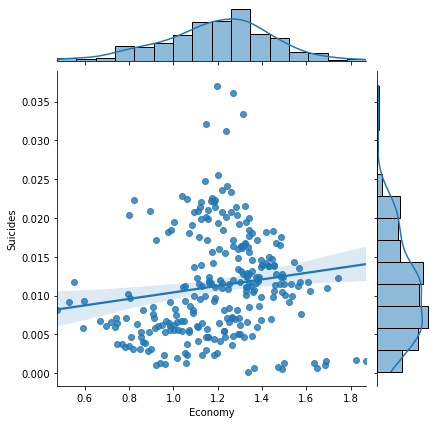

In [23]:
sns.jointplot(x="Economy", y="Suicides", data=df_final, kind="reg")
plt.show()

In [24]:
X = np.array(df_final["Economy"])
X = X.reshape(len(X), 1)
y = df_final[["Suicides"]]

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.3)

In [26]:
reg = LinearRegression()
model = reg.fit(x_train1, y_train1)
print("Intercept: ", model.intercept_[0])
print("Coef: ", model.coef_[0][0])
print("Rscore: ", model.score(x_train1, y_train1))

Intercept:  0.006107644513102364
Coef:  0.004297011851302974
Rscore:  0.024623722987342944


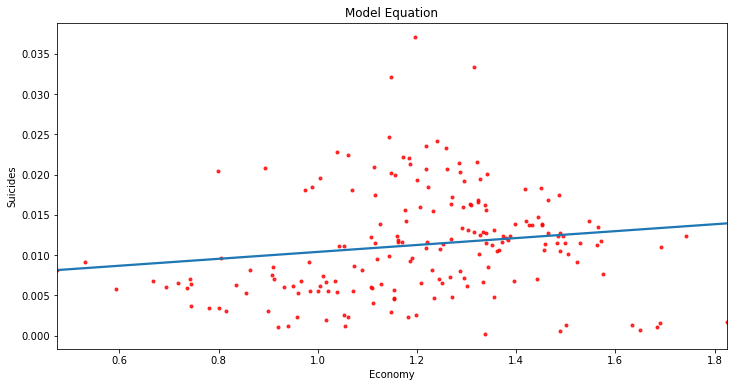

In [27]:
plt.figure(figsize=(12, 6))
g = sns.regplot(x=x_train1, y=y_train1, ci=None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("Suicides")
g.set_xlabel("Economy")
plt.show()

In [28]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("La cantidad de suicidios de un pais con Economy GDP ", g[0], ": ", model.predict([g])[0][0])

La cantidad de suicidios de un pais con Economy GDP  0.25 :  0.007181897475928107
La cantidad de suicidios de un pais con Economy GDP  0.5 :  0.008256150438753851
La cantidad de suicidios de un pais con Economy GDP  0.75 :  0.009330403401579595
La cantidad de suicidios de un pais con Economy GDP  1.0 :  0.010404656364405337
La cantidad de suicidios de un pais con Economy GDP  1.25 :  0.011478909327231081
La cantidad de suicidios de un pais con Economy GDP  1.5 :  0.012553162290056825


In [29]:
print("Mean Squared Error: ", mean_squared_error(model.predict(x_train1), y_train1))
print("Root Mean Squared Error: ", r2_score(model.predict(x_train1), y_train1))
print("Mean Absolute Error: ", mean_absolute_error(model.predict(x_train1), y_train1))

Mean Squared Error:  4.266886774855939e-05
Root Mean Squared Error:  -38.611243089195824
Mean Absolute Error:  0.00495966742555322


In [30]:
print("Mean Squared Error: ", mean_squared_error(model.predict(x_test1), y_test1))
print("Root Mean Squared Error: ", r2_score(model.predict(x_test1), y_test1))
print("Mean Absolute Error: ", mean_absolute_error(model.predict(x_test1), y_test1))

Mean Squared Error:  5.11361593943445e-05
Root Mean Squared Error:  -50.111418084360665
Mean Absolute Error:  0.005707622002141734


In [31]:
def linear_reg(col, text, prdctn):
    
    sns.jointplot(x=col,y="Suicides", data=df_final, kind="reg")
    plt.show()
    
    y = df_final[["Suicides"]]
    X = np.array(df_final[col])
    X = X.reshape(len(X), 1)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

    reg = LinearRegression()
    model = reg.fit(x_train, y_train)
    
    # prediction
    plt.figure(figsize=(12, 6))
    g = sns.regplot(y=y_train, x=x_train, ci=None, scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("Suicides")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]])[0][0])
    
    print("TRAIN")
    print("Mean Squared Error: ", mean_squared_error(model.predict(x_train), y_train))
    print("Root Mean Squared Error: ", r2_score(model.predict(x_train), y_train))
    print("Mean Absolute Error: ", mean_absolute_error(model.predict(x_train), y_train))
    
    print("TEST")
    print("Mean Squared Error: ", mean_squared_error(model.predict(x_test), y_test))
    print("Root Mean Squared Error: ", r2_score(model.predict(x_test), y_test))
    print("Mean Absolute Error: ", mean_absolute_error(model.predict(x_test), y_test))

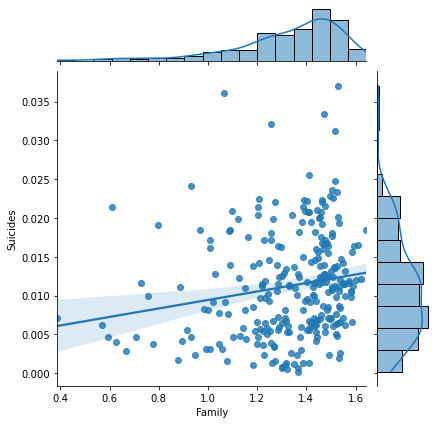

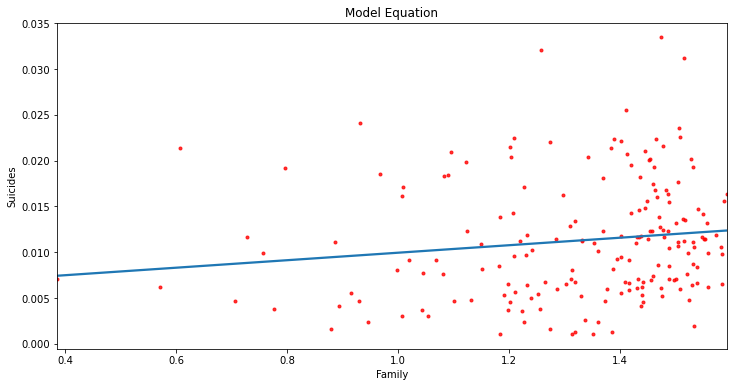

La cantidad de suicidios de un pais con Family 2 :  0.014041609053126815
TRAIN
Mean Squared Error:  4.091647203823232e-05
Root Mean Squared Error:  -48.79677595417579
Mean Absolute Error:  0.005081446181223152
TEST
Mean Squared Error:  5.414324467859699e-05
Root Mean Squared Error:  -74.91720787160331
Mean Absolute Error:  0.00574271932914194


In [32]:
linear_reg("Family", "La cantidad de suicidios de un pais con Family 2", 2)

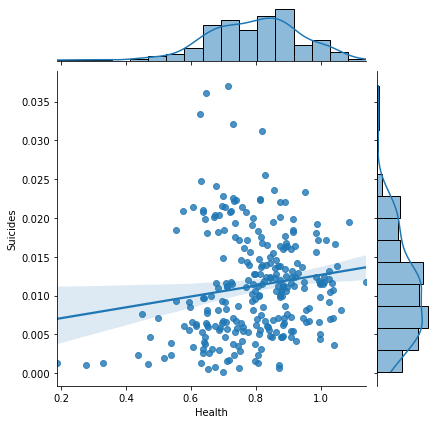

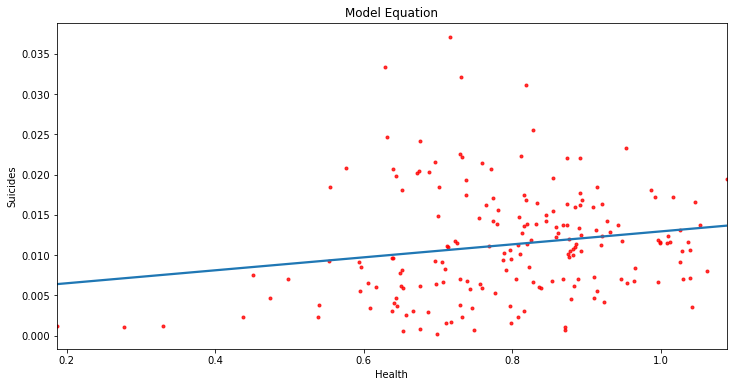

La cantidad de suicidios de un pais con Health 1.20 :  0.014568290807157708
TRAIN
Mean Squared Error:  4.491668948945897e-05
Root Mean Squared Error:  -29.45991360097125
Mean Absolute Error:  0.005154804625093666
TEST
Mean Squared Error:  4.607023122288949e-05
Root Mean Squared Error:  -45.16922257413481
Mean Absolute Error:  0.005434265226753554


In [33]:
linear_reg("Health","La cantidad de suicidios de un pais con Health 1.20", 1.20)

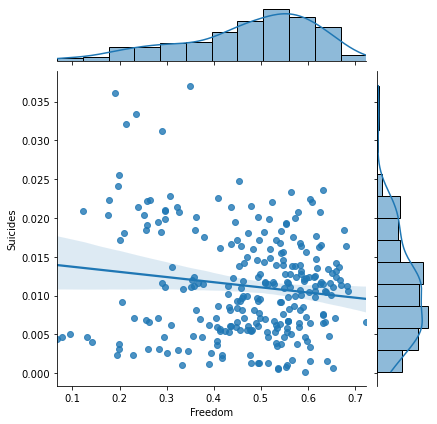

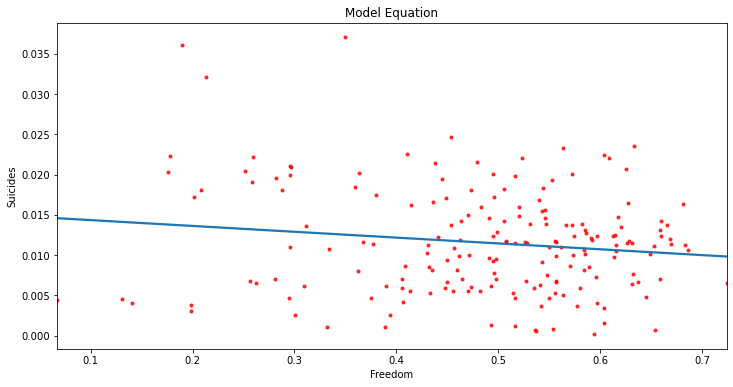

La cantidad de suicidios de un pais con Freedom 0.89 :  0.008628985836764635
TRAIN
Mean Squared Error:  4.17460416654005e-05
Root Mean Squared Error:  -45.25392259778777
Mean Absolute Error:  0.005114383444245011
TEST
Mean Squared Error:  5.438213611123235e-05
Root Mean Squared Error:  -44.52396505158231
Mean Absolute Error:  0.006331640358890557


In [34]:
linear_reg("Freedom", "La cantidad de suicidios de un pais con Freedom 0.89", 0.89)

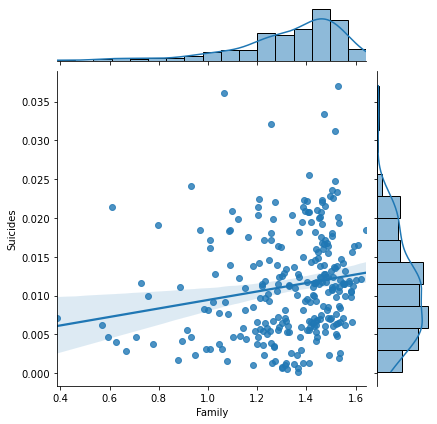

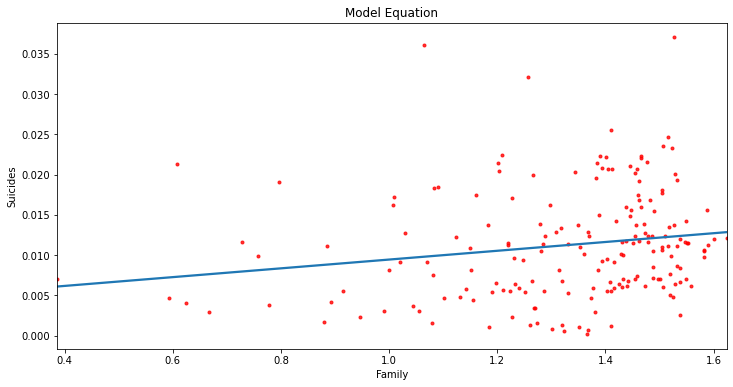

La cantidad de suicidios de un pais con Family 2 :  0.031276362241892314
TRAIN
Mean Squared Error:  4.4492697158275716e-05
Root Mean Squared Error:  -28.81454059171666
Mean Absolute Error:  0.005217149683370662
TEST
Mean Squared Error:  4.55771936215793e-05
Root Mean Squared Error:  -37.0096115148734
Mean Absolute Error:  0.005377858834214709


In [35]:
linear_reg("Family", "La cantidad de suicidios de un pais con Family 2", 5)

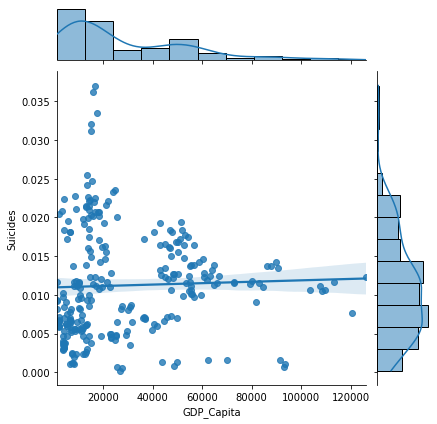

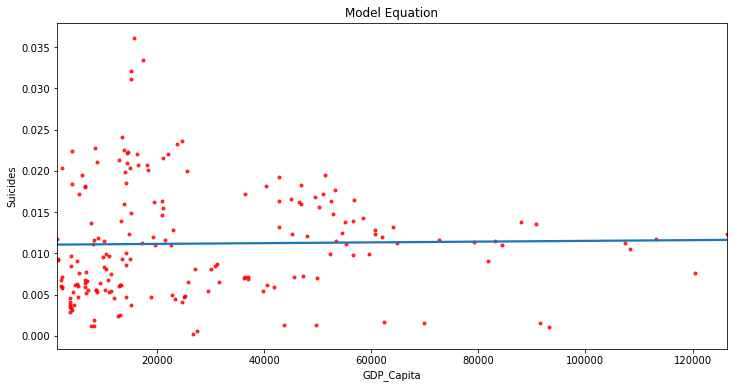

La cantidad de suicidios de un pais con GDP_Capita 500 :  0.011054739391266576
TRAIN
Mean Squared Error:  4.6223114147519536e-05
Root Mean Squared Error:  -3143.3625110928374
Mean Absolute Error:  0.005427337347783318
TEST
Mean Squared Error:  4.61156114889759e-05
Root Mean Squared Error:  -3061.5979274422316
Mean Absolute Error:  0.005190806020852022


In [36]:
linear_reg("GDP_Capita", "La cantidad de suicidios de un pais con GDP_Capita 500", 500)

In [37]:
df = df_final.copy()
df = df.select_dtypes(include=["float64","int64"])

X = df.drop("Suicides", axis=1)
y = df["Suicides"]

lm = sms.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Suicides   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              94.70
Date:                Fri, 28 May 2021   Prob (F-statistic):                    1.10e-76
Time:                        12:40:29   Log-Likelihood:                          976.12
No. Observations:                 268   AIC:                                     -1934.
Df Residuals:                     259   BIC:                                     -1902.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP_Capita -4.638e-08   3.48e-08     -1.332      0.184   -1.15e-07    2.22e-08
Year       -2.655e-06   2.35e-06     -1.130      0.260   -7.28e-06    1.97e-06
Economy        0.0068      0.003      2.245      0.026       0.001       0.013
Family         0.0063      0.002      2.921      0.004       0.002       0.011
Health         0.0041      0.004      1.122      0.263      -0.003       0.011
Freedom       -0.0105      0.005     -2.247      0.025      -0.020      -0.001
Trust          0.0006      0.005      0.109      0.913      -0.009       0.011
Generosity    -0.0076      0.004     -1.902      0.058      -0.015       0.000
Score          0.0007      0.001      0.823      0.411      -0.001       0.003
==============================================================================
Omnibus:                        9.777   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.799
Skew:                           0.451   Prob(JB):                      0.00745
Kurtosis:                       3.253   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""